<a href="https://colab.research.google.com/github/DVORA-AZARKOVICH/Narrative-Similarity/blob/main/ensamble_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ניתוח עבור 400 דגימות ראשונות.


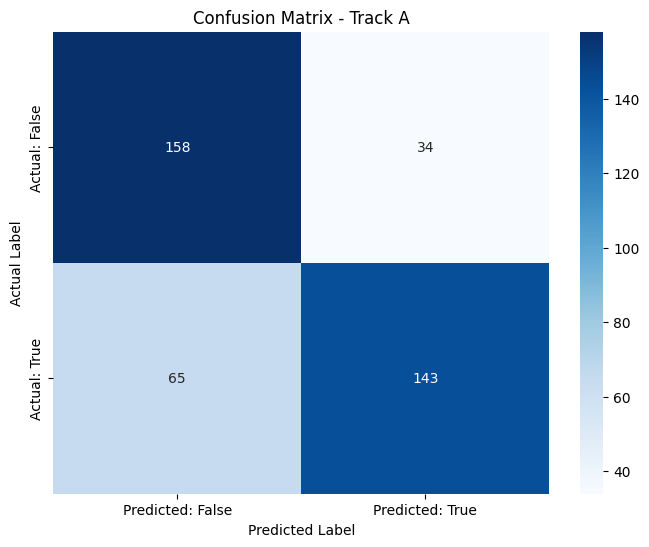


Accuracy Score: 0.7525

Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.82      0.76       192
        True       0.81      0.69      0.74       208

    accuracy                           0.75       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.76      0.75      0.75       400



In [ ]:
import json
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. טעינת הלייבלים (Ground Truth)
labels_file = 'test_track_a_labels.jsonl'
y_true_all = []
with open(labels_file, 'r', encoding='utf-8') as f:
    for line in f:
        y_true_all.append(json.loads(line)['text_a_is_closer'])

# 2. טעינת התחזיות מתוך קובץ ה-ZIP
zip_file_path = 'submission_robust_test (1).zip'
prediction_file_name = 'track_a.jsonl'
y_pred = []

with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(prediction_file_name) as f:
        for line in f:
            y_pred.append(json.loads(line)['text_a_is_closer'])

# 3. התאמת אורך הרשימות (במקרה שיש הבדל בכמות השורות)
n_samples = min(len(y_true_all), len(y_pred))
y_true = y_true_all[:n_samples]
y_pred = y_pred[:n_samples]

print(f"ניתוח עבור {n_samples} דגימות ראשונות.")

# 4. יצירת Confusion Matrix
labels = [False, True]
cm = confusion_matrix(y_true, y_pred, labels=labels)

# 5. ויזואליזציה ב-Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: False', 'Predicted: True'],
            yticklabels=['Actual: False', 'Actual: True'])
plt.title('Confusion Matrix - Track A')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 6. הדפסת מדדים נוספים
print("\nAccuracy Score:", accuracy_score(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['False', 'True']))